In [109]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("../data/titanic_train.csv")
df_test = pd.read_csv("../data/titanic_test.csv")

In [2]:
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


0    563
1    353
Name: survived, dtype: int64


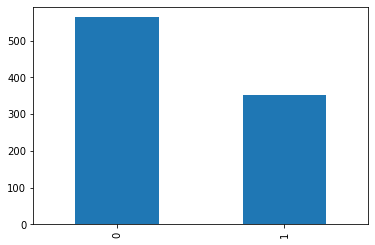

In [8]:
df_train['survived'].value_counts().plot.bar()
print(df_train['survived'].value_counts())

# 0:사망, 1:생존

타이타닉 생존율에 관한 데이터 분석이므로, 생존과 상관없는 필요하지 않은 피처들을 제거한다.

In [110]:
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)

In [14]:
#survived와 pclass의 분포
df_train.groupby('survived')['pclass'].value_counts()

survived  pclass
0         3         369
          2         106
          1          88
1         1         142
          3         129
          2          82
Name: pclass, dtype: int64

항목별 갯수를 세어주는 seaborn의 countplot을 이용하여 그래프표시

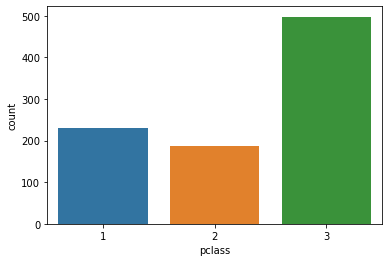

In [16]:
ax = sns.countplot(x='pclass', data=df_train)

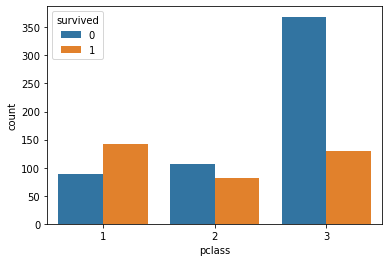

In [17]:
ax = sns.countplot(x='pclass', hue='survived', data=df_train)

수치형 피처에 대한 탐색, 수치형 column을 하나 받아와서 survived=0, survived=1을 기준으로 두 개로 나누고,

그 두 집단을 4가지 기능으로 탐색한다.

1. 두 집단의 분포를 비교하는 그래프 출력

2. 두 그룹 각각의 표준편차 출력

3. 두 그룹의 T-test 검정 실시

4. 두 그룹의 정규성을 검증하기 위하여 Shapiro-wilk 실시

In [71]:
from scipy import stats

def valid_features(df, col_name):
    #두 집단의 피처 한번에 그리기
    #seaborn의 facet은  col을 두 집단으로 나누어 그래프로 표현
    fact = sns.FacetGrid(df, col='survived')
    fact.map(plt.hist, col_name, bins=30)
    
    #표준편차 구하기
    df_survived = df[df['survived'] == 1]
    df_survived_std = np.std(df_survived[col_name])
    df_not_survived = df[df['survived'] == 0]
    df_not_survived_std = np.std(df_not_survived[col_name])
    print('survived data std is ', df_survived_std)
    print('not survived data std is ', df_not_survived_std)

    #T-test로 survived라는 질적변수가 age라는 양적변수에 영향을 미치는지 유의성 검사
    t_test_result = stats.ttest_ind(df_survived[col_name], df_not_survived[col_name])
    #표본데이터를 추출할 때 등분산인지, 이분산인지 모르기에 두개 다 추출
    t_test_result_diff_var = stats.ttest_ind(df_survived[col_name], df_not_survived[col_name], equal_var=False)
    print('eqaul variances t-value is %.3f p-value is %.3f' % t_test_result)
    print('not eqaul variances t-value is %.3f p-value is %.3f' % t_test_result_diff_var)
    
    # 유의미한 데이터는 기본적으로 정규성을 따른다. Shapiro-wilk 검정을 통하여 정규성 검사
    shapiro_test_result_survived = stats.shapiro(df_survived[col_name])
    shapiro_test_result_not_survived = stats.shapiro(df_not_survived[col_name])
    print('survived data w-value is %.3f p-value is %.3f' % shapiro_test_result_survived)
    print('not survived data w-value is %.3f p-value is %.3f' % shapiro_test_result_not_survived)
    

> **t-test** : 모집단이 아닌, 표본집단으로 데이터를 분석할 경우 두 집단의 유의성 검증 방법중 하나로, 

> t-value에 결정되는 p-value가 0.05 이하면, 이 표본은 유의미히다라 분석이 돼, 가설에서 귀무가설이 기각, 대립가설이 채택된다.

survived data std is  14.217910655097782
not survived data std is  13.710056914150487
eqaul variances t-value is -0.546 p-value is 0.585
not eqaul variances t-value is -0.543 p-value is 0.587
survived data w-value is 0.982 p-value is 0.001
not survived data w-value is 0.968 p-value is 0.000


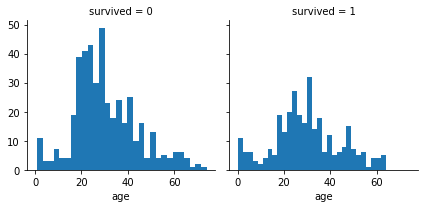

In [72]:
#survived에 대한 age 분석
valid_features(df_train[df_train['age'] > 0], 'age')

> 해석 : t-test의 p-value가 0.5이므로, age값은 survived에 영향을 주지 않는다.

> shapiro-wilk test의 p-value는 0.001이므로, 정규성을 띈다.

survived data std is  0.6446237728482053
not survived data std is  1.3378398289092357
eqaul variances t-value is -2.118 p-value is 0.034
not eqaul variances t-value is -2.446 p-value is 0.015
survived data w-value is 0.656 p-value is 0.000
not survived data w-value is 0.492 p-value is 0.000


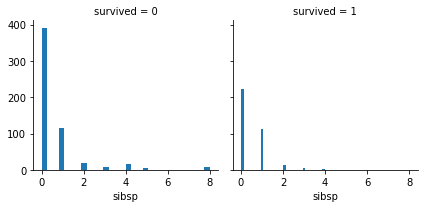

In [73]:
valid_features(df_train, 'sibsp')

> t-test의 p-value가 전부 0.05이하이기 때문에 **sibsp**은 **survived**에 영향을 준다라고 볼 수 있다.

> shapiro-wilk의 p-value가 전부 0.000~이기 때문에 정규성을 가지고 았다.

In [114]:
df_train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.000000,0,1,19.5000,S
1,2,1,female,4.000000,1,1,23.0000,S
2,2,1,female,30.000000,1,0,13.8583,C
3,3,0,male,30.231444,0,0,7.7250,Q
4,3,1,female,22.000000,0,0,7.7250,Q


In [113]:
#결측값을 가지고 있는 age, embarked 전처리 age : 평균으로 대체, embarked : 최빈값으로 대체
replace_age = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_age)
df_test['age'] = df_train['age'].fillna(replace_age)

replace_embarked = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(replace_embarked)
df_test['embarked'] = df_train['embarked'].fillna(replace_embarked)

In [137]:
#범주형 변수를 one-hot encoding방식으로 전처리함. 
total_df = df_train.append(df_test)
total_df_encoded = pd.get_dummies(total_df)

#one-hot encoded 완료하면, 다시 학습, 테스트 데이터로 나눔
df_train = total_df_encoded[:len(df_train)]
df_test = total_df_encoded[len(df_train):]



/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_1148/3290536162.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = df_train.append(df_test)


393

데이터 전처리 완료했다면 로지스틱 회귀 모델로 학습 후 그 분류 모델로 테스트 데이터에 대한 예측 결과를 반환한다.

> 학습이 완료된 모델에 새로운 데이터를 입력하면, 여러 가지 값들로 결과를 반환하는 것을 분류라 한다.

> ex) embarked나 pclass 등등의 값들로 survived의 값을 분류함.

In [152]:
from sklearn.linear_model import LogisticRegression

#학습 데이터 분류
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train.loc[:, 'survived'].values
#로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
#테스트 데이터 분류
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
#학습 모델로 테스트 데이터 예측
y_predict = lr.predict(x_test)
#predict_proba는 예측 확률 값
y_predict_probability = lr.predict_proba(x_test)[:, 1]

/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
#분류모델 평가하기
#테스트 데이터셋에 대한 4가지 평가지표 정확도, 정밀도, 민감도, f1_score
#이 4개의 점수는 confusion matrix를 이용하여 구한다.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy is %.3f' % accuracy_score(y_test, y_predict))
print('precision is %.3f' % precision_score(y_test, y_predict))
print('Recall is %.3f' % recall_score(y_test, y_predict))
print('F1 is %.3f' % f1_score(y_test, y_predict))

accuracy is 0.771
precision is 0.732
Recall is 0.612
F1 is 0.667


- accuracy_score : 전체 데이터 중 정확하게 예측한 데이터
- precision_score : 예측한 양성 데이터(TP, FP) 중 진짜 양성 데이터의 비율
- recall_score : 진짜 양성인 데이터 중, 올바르게 양성으로 판단한 비율
- f1_score : recall과 precision을 결합하여 만든 값.

이 4가지 점수 다 1에 가까울수록 성능이 좋은것을 의미

In [141]:
#Confusion Matrix로 모델 평가
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
confusion_mat

array([[213,  33],
       [ 57,  90]])

- 0,0 = True Positives(1인 값을 1이라 한 경우)
- 0,1 = False Negatives(1인 값을 0이라 한 경우)
- 0,0 = False Positives(0인 값을 1이라 한 경우)
- 0,0 = True Negatives(0인 값을 1이라 한 경우)

모델의 AUC 구하기, 모델울 평가하는 것

AUC는 y_pred값이 아닌, 0~1 사이의 값을 가진 y_pred_probability, 확률값을 사용함.

AUC 값은 0.805


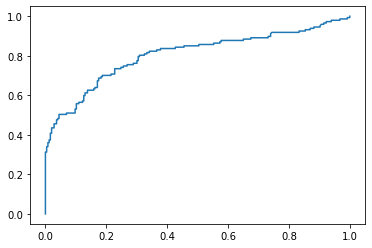

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict_probability)
roc_auc = roc_auc_score(y_test, y_predict_probability)

plt.plot(false_positive_rate, true_positive_rate)
print('AUC 값은 %.3f' % roc_auc)

지금까지 로지스틱 회귀 모델로 학습 후, 예측된 데이터를 반환하고, 그 모델을 평가하였다.

이번에는 다른 모델인 의사결정 나무모델을 이용하여 학습 후, 예측 데이터 반환 후, 그 모델을 평가해본다.

accuracy score is 0.74
precision score is 0.67
f1 score is 0.63
recall score is 0.60
AUC score is 0.71


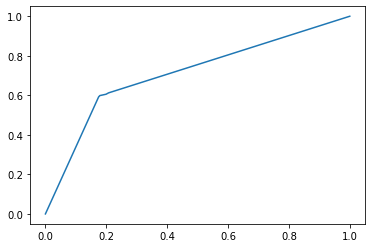

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

#모델에 학습 데이터로 학습
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
#학습된 모델로 예측 데이터 반환
y_predict = dtc.predict(x_test)
y_predict_probability = dtc.predict_proba(x_test)[:,1]

#학습한 모델의 4가지 성능점수 출력
print('accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('precision score is %.2f' % precision_score(y_test, y_predict))
print('f1 score is %.2f' % f1_score(y_test, y_predict))
print('recall score is %.2f' % recall_score(y_test, y_predict))

#학습한 모델의 AUC 출력(평가지표)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict_probability)
roc_auc = roc_auc_score(y_test, y_predict_probability)
print('AUC score is %.2f' % roc_auc)

plt.plot(false_positive_rate, true_positive_rate)


로지스틱 회귀 모델, 의사결정 나무 모델로 학습 후, 데이터 예측을 하고, 이 결과로 모델의 평가도 하였다. 다음은 이 모델들의 성능 개선을 하는 것이다.

방법 중 하나인 **Feature engineering**은 모델에 사용할 feature을 가공하는 분석 작업을 의미. 

In [315]:
#feature engineering을 하기 전에 다시 학습데이터, 테스트 데이터를 전처리한다.

df_train = pd.read_csv("../data/titanic_train.csv")
df_test = pd.read_csv("../data/titanic_test.csv")
#쓸모없는 데이터 삭제
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis=1)
df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis=1)


In [316]:
#결측값 전처리
whole_df = df_train.append(df_test)
replace_mean = whole_df[whole_df['age'] > 0]['age'].mean()
whole_df['age'] = whole_df['age'].fillna(replace_age)
replace_embarked = whole_df['embarked'].value_counts().index[0]
whole_df['embarked'] = whole_df['embarked'].fillna(replace_embarked)

/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_1148/2179166631.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = df_train.append(df_test)


In [317]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


모델 성능 개선을 위해 cabin 피처를 활용한다.

In [318]:
#cabin의 결측값은 X로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')
#cabin의 앞 알파벳만 따온다. 뒤의 숫자 제거
whole_df['cabin'] = whole_df['cabin'].apply(lambda x:x[0])
whole_df['cabin'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

In [319]:
#G랑 T는 데이터를 비교하기에 너무 적기에, 결측값인 X로 바꾼다.
whole_df['cabin'] = whole_df['cabin'].replace('G', 'X')
whole_df['cabin'] = whole_df['cabin'].replace('T', 'X')
whole_df['cabin'].value_counts()

X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64

<AxesSubplot:xlabel='cabin', ylabel='count'>

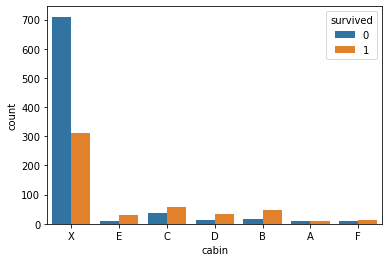

In [320]:
sns.countplot(x=whole_df['cabin'], hue='survived', data=whole_df)


다음은 name 피처를 활용한다. name 데이터의 구성은 성, 호칭, 이름으로 구성돼있다. 1910년대는 사회적 계급이 있기 때문에 name에 있는 호칭으로 구별해보자.

In [321]:
name_grade = whole_df['name'].apply(lambda x:x.split(',')[1].split('.')[0])
name_grade.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Dr                8
 Rev               8
 Col               4
 Mlle              2
 Ms                2
 Major             2
 Jonkheer          1
 Don               1
 Lady              1
 Mme               1
 Dona              1
 the Countess      1
 Sir               1
 Capt              1
Name: name, dtype: int64

,와 .사이에 호칭이 있다

In [322]:
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성
              'C': ['Jonkheer', 'the Countess'], # 귀족
              'D': ['Mr', 'Don'], # 남성
              'E': ['Master'], # 젊은남성
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성
replace_name = []

for columns in whole_df['name']:
    grade = columns.split(',')[1].split('.')[0]
    grade = grade[1:]
    for key, values in grade_dict.items():
        for title in values:
            if title == grade:
                replace_name.append(key)

whole_df['name'] = replace_name
whole_df = whole_df.rename(columns = {'name' : 'grade'})

In [324]:
whole_df['grade'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

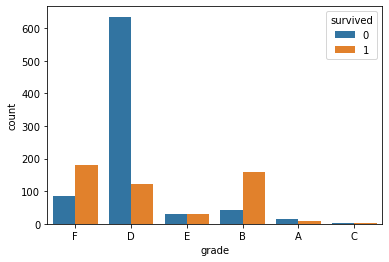

In [327]:
sns.countplot(x=whole_df['grade'], hue='survived', data=whole_df)

In [330]:
#one-hot encoding 적용 후, 학습 데이터 테스트 데이터 분리
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:len(df_train)]
df_test = whole_df_encoded[:len(df_test)]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,grade_A,grade_B,grade_C,grade_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


accuracy score is 0.824
precision score is 0.776
recall score is 0.760
f1 score is 0.768
ACU score is 0.875


/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


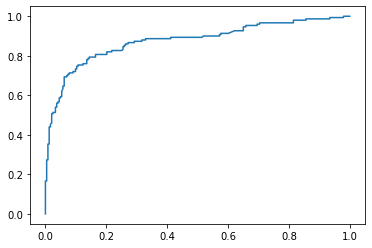

In [353]:
#피처 엔지니어링으로 전처리된 데이터를 다시 Logistic Regression 모델로 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#학습데이터, 테스트데이터 분류
x_train = df_train.loc[:, df_train.columns != 'survived'].values
y_train = df_train['survived'].values

x_test = df_test.loc[:, df_train.columns != 'survived'].values
y_test = df_test['survived'].values
#모델 학습
lr = LogisticRegression()
lr.fit(x_train, y_train)
#모델을 이용하여 예측 데이터 반환
y_predict = lr.predict(x_test)
y_predict_probability = lr.predict_proba(x_test)[:,1]

#모델 평가 점수
print('accuracy score is %.3f' % accuracy_score(y_test, y_predict))
print('precision score is %.3f' % precision_score(y_test, y_predict))
print('recall score is %.3f' % recall_score(y_test, y_predict))
print('f1 score is %.3f' % f1_score(y_test, y_predict))

#AUC 구하기
fpr, tpr, thresholds = roc_curve(y_test, y_predict_probability)
roc_auc = roc_auc_score(y_test, y_predict_probability)

print('ACU score is %.3f' % roc_auc)

plt.plot(fpr, tpr)

모델의 성능을 높였으니, 마지막으로 완성된 분류 모델을 검증하는 것이다. **모델 과적합 여부**를 검증해야 한다. 검증 방법은 두 가지로써

1. K-fold 교차 검증
2. 학습 곡선 분석

> k-fold 는 데이터를 k개로 나누고, 1개는 test, k-1개는 train 데이터로 사용하는 방법

/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

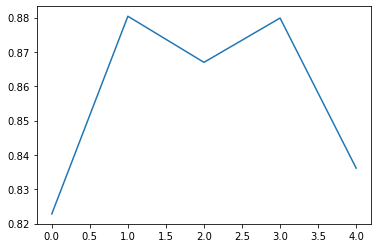

In [359]:
#k-fold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
k = 5
#k-foldf 갹체 생성
cv = KFold(n_splits=k, shuffle=True, random_state=0)
#enumerate는 index + value

auc_history = []
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]

    #k-fold로 나눈 데이터들을 다시 train, test로 분할
    x_train = df_train.loc[:, df_train.columns != 'survived'].values
    y_train = df_train['survived'].values
    x_test = df_test.loc[:, df_test.columns != 'survived'].values
    y_test = df_test['survived'].values
    #모델 학습
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    #모델 예측
    y_pred = lr.predict(x_test)
    y_pred_prob = lr.predict_proba(x_test)[:,1]
    #AUC 점수 구하기
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    auc_history.append(roc_auc)

plt.plot(auc_history)




> 대체적으로 AUC가 0.8이상의 수치를 가지고 있으므로 높은 정확도를 가진 모델이다.

/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

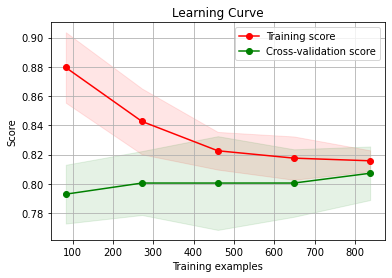

In [367]:
#학습곡선
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()